In [ ]:
#Homework # 4 - Andrew Pacumio
#Pyber data

In [331]:
#import dependencies
import csv
import os
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from collections import Counter
import matplotlib.patches as mpatches
import seaborn

In [11]:
# Establish the root path and resource path
root_path = os.getcwd()
resource_path = os.path.join(root_path, "raw_data")

ride_data_file = os.path.join(resource_path, "ride_data.csv")
city_data_file = os.path.join(resource_path, "city_data.csv")

In [12]:
#read the ride_data.csv file and create a data frame
ride_data_pd = pd.read_csv("raw_data/ride_data.csv")
ride_data_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [13]:
city_data_pd = pd.read_csv("raw_data\city_data.csv")
city_data_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [195]:
#stats for the bubble plot
#average fare per city
avg_fare_per_city = pd.DataFrame(ride_data_pd.groupby("city")["fare"].mean()).reset_index()
avg_fare_per_city.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [204]:
#number of rides per city
num_rides_per_city = pd.DataFrame(ride_data_pd.groupby("city")["ride_id"].count()).reset_index()
num_rides_per_city.head()

,city,ride_id
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [214]:
#number of drivers per city
num_drivers_per_city = pd.DataFrame(city_data_pd.groupby("city")["driver_count"].mean()).reset_index()
num_drivers_per_city.head()

,city,driver_count
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [424]:
#combine the dataframes together
m1 = avg_fare_per_city.merge(num_rides_per_city, left_on="city", right_on="city", how="outer")
m2 = m1.merge(num_drivers_per_city, left_on="city", right_on="city", how="outer")
main = m2.merge(city_data_pd, left_on="city", right_on="city", how="left")

#urban = gold, suburbran = light sky blue, rural = light coral
#get a color list
colors = []
for index, row in main.iterrows():
    if row["type"] == "Urban":
        #main.set_value(index, row["color"], "gold")
        colors.append("gold")
    if row["type"] == "Suburban":
        #main.set_value(index, row["color"], "lightskyblue")
        colors.append("lightskyblue")
    if row["type"] == "Rural":
        #main.set_value(index, row["color"], "coral") 
        colors.append("coral")

main.head()

,city,fare,ride_id,driver_count_x,driver_count_y,type
0,Alvarezhaven,23.928710,31,21,21,Urban
1,Alyssaberg,20.609615,26,67,67,Urban
2,Anitamouth,37.315556,9,16,16,Suburban
3,Antoniomouth,23.625000,22,21,21,Urban
4,Aprilchester,21.981579,19,49,49,Urban


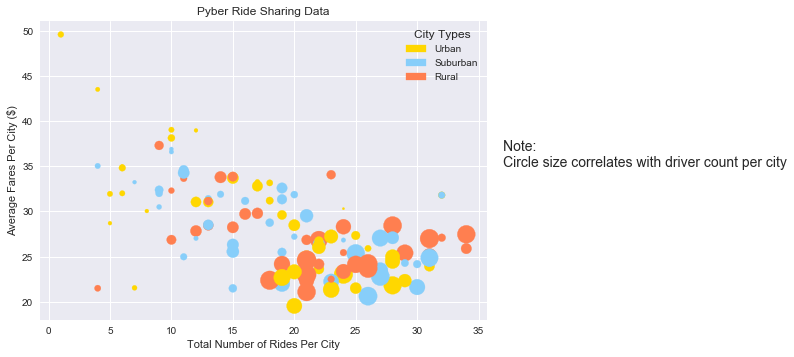

In [434]:
#define the values for the x and y axis and the size of the markers
x = main["ride_id"]
y = main["fare"]
s = [5 * x for x in main["driver_count_x"]] #multiply the driver count to make 
                                            #the scatter points more visible

#label the axis and create a title for the scatter plot
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fares Per City ($)")

#define values for the legend
urban = mpatches.Patch(color='gold', label='Urban')
suburban = mpatches.Patch(color='lightskyblue', label='Suburban')
rural = mpatches.Patch(color='coral', label='Rural')

plt.scatter(x=x,y=y,s=s, color=colors, marker="o")
plt.legend(title="City Types", handles=[urban, suburban, rural], )

plt.text(37, 35, "Note: \nCircle size correlates with driver count per city", fontsize=14)

plt.show()

In [435]:
#city types 
city_type = pd.DataFrame(city_data_pd.groupby("type")["city"].count()).reset_index() 
city_type

,type,city
0,Rural,18
1,Suburban,42
2,Urban,66


In [436]:
#join the two dataframes together
merged_data_df = ride_data_pd.merge(city_data_pd, left_on="city", right_on="city", how="left")

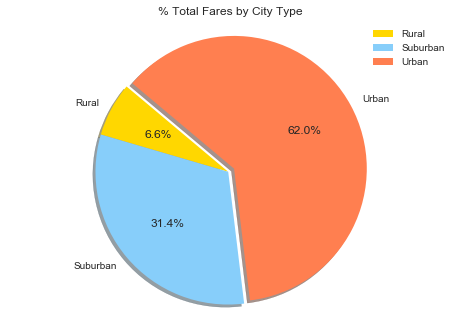

In [437]:
#total fares by city type
fares_by_city_type = pd.DataFrame(merged_data_df.groupby("type")["fare"].sum()).reset_index()
labels = fares_by_city_type["type"]
values = fares_by_city_type["fare"]
colors = ["gold", "lightskyblue", "coral"]
explode = [0, 0, 0.05]
plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("% Total Fares by City Type")
plt.legend(labels, loc="upper right")
plt.show()

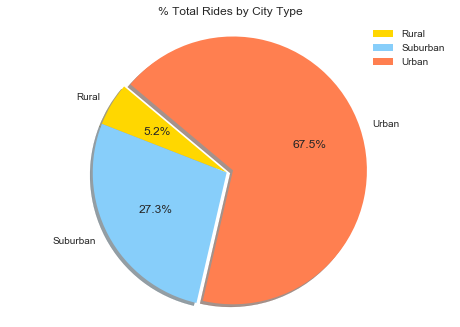

In [438]:
#total rides by city type
rides_by_city_type = pd.DataFrame(merged_data_df.groupby("type")["fare"].count()).reset_index()
labels = rides_by_city_type["type"]
values = rides_by_city_type["fare"]
colors = ["gold", "lightskyblue", "coral"]
explode = [0, 0, 0.05]
plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("% Total Rides by City Type")
plt.legend(labels, loc="upper right")
plt.show()

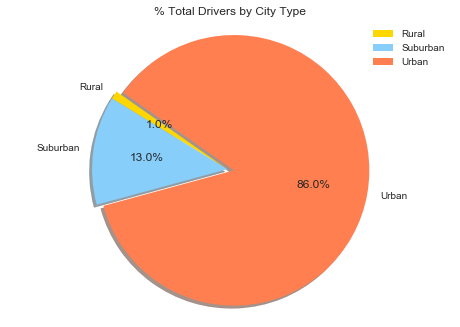

In [439]:
#total drivers per city type
drivers_per_city_type = pd.DataFrame(merged_data_df.groupby("type")["driver_count"].sum()).reset_index()
labels = drivers_per_city_type["type"]
values = drivers_per_city_type["driver_count"]
colors = ["gold", "lightskyblue", "coral"]
explode = [0, 0, 0.05]
plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=145)
plt.axis('equal')
plt.title("% Total Drivers by City Type")
plt.legend(labels, loc="upper right")
plt.show()